In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stat

In [2]:
m20 = np.load('/Users/jsmonzon/lbg_da/tau_data/test/tau.npy')

bootstrap = np.load('/Users/jsmonzon/lbg_da/tau_data/test/bootstrap.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jsmonzon/lbg_da/tau_data/test/tau.npy'

In [3]:
m20.shape

(2, 114)

In [17]:
bootstrap.shape #5000 rows, 114 columns

variance = np.sum([(val - np.median(m20[1]))**2 for val in m20[1]])/len(m20[1])

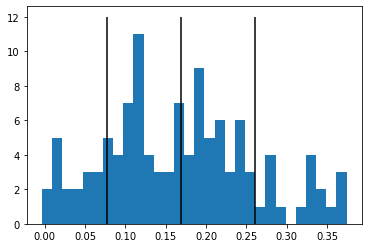

In [21]:
plt.hist(m20[1], bins=30)
plt.vlines(np.median(m20[1]), 0, 12)
plt.vlines(np.median(m20[1]) + np.sqrt(variance), 0, 12)
plt.vlines(np.median(m20[1]) - np.sqrt(variance), 0, 12)
plt.show()

In [18]:
variance



0.008497162917112621

In [5]:
hmm=np.cov(np.transpose(bootstrap))

hmm.shape

(114, 114)

In [6]:
one_mat = np.ones(shape=(5000,5000))

In [7]:
devs = bootstrap - np.matmul(one_mat, bootstrap)/5000

In [8]:
sum_sqaure = np.dot(np.transpose(devs), devs)

In [9]:
covariance = sum_sqaure/5000

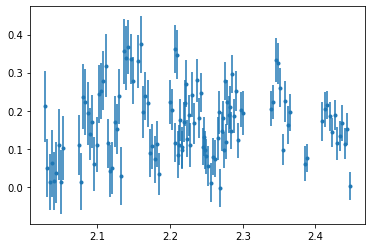

In [10]:
plt.errorbar(m20[0],m20[1], yerr=np.sqrt(np.diagonal(hmm)), fmt='.')
plt.show()

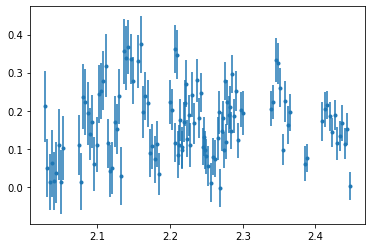

In [11]:
plt.errorbar(m20[0],m20[1], yerr=np.sqrt(np.diagonal(covariance)), fmt='.')
plt.show()

In [ ]:
#the function to fit to
def tau_ev(z,a,b):
    return a*((1+z)/(1+2.22))**b

z_range = np.linspace(2.0, 2.5, 100)

In [ ]:
popt, pcov = opt.curve_fit(tau_ev, m20[0], m20[1], sigma = hmm)

In [ ]:
def sigma_tau(z, a, b, da, db):
    
    dtau_da = ((1+z) / (1+2.22))**b
    
    dtau_db = (a*b)*((1+z) / (1+2.22))**(b-1)
    
    return np.sqrt((dtau_da * da)**2 + (dtau_db *db)**2)

In [ ]:
sig_ev = sigma_tau(z_range, popt[0], popt[1], pcov[0,0], pcov[1,1])

In [ ]:
plt.figure(figsize=(10,5))

plt.errorbar(m20[0], m20[1], yerr=np.sqrt(np.diagonal(covariance)), fmt=".",color="black", capsize=3, label="$τ_{eff}$ measurments")
plt.plot(z_range, tau_ev(z_range, popt[0], popt[1]), color="#f03b20", ls="--", label="Least Sqaures Fit")
plt.plot(z_range, tau_ev(z_range, popt[0], popt[1])+sig_ev , color="#f03b20", label="$\pm\ 1 \sigma$")
plt.plot(z_range, tau_ev(z_range, popt[0], popt[1])-sig_ev, color="#f03b20")

plt.xlabel("$z$",fontsize=15)
plt.ylabel("$τ_{eff}$",fontsize=15)

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2.0, 2.5)
#plt.ylim(-.4,1.5)

#plt.savefig("/Users/jsmonzon/lbg_da/figures/least_squares.pdf")
plt.show()
